Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
import sys
from pathlib import Path

parent_dir = Path.cwd().parent.parent

if str(parent_dir) not in sys.path:
    sys.path.insert(0, str(parent_dir))
from shared.metrics import print_evaluation_metrics
from shared.helpers import store_model

Load dataset and prepare df

In [2]:
file_path = "../data/parsed_dataset.csv"
date_column = "Date_reported"
target_column = "New_deaths"
df = pd.read_csv(file_path, parse_dates=True)

df = df.groupby(date_column).sum().reset_index()
df.set_index(date_column, inplace=True)
df = df.dropna()

dates = df.index.values
df = df.select_dtypes(exclude=["object"])

Train test split

In [3]:
data_length = len(df)
train_split = 0.9
train = df.iloc[:int(data_length*train_split)]
test = df.iloc[int(data_length*train_split):]

Create the model

In [27]:
model = LinearRegression().fit(
    train.drop(columns=[target_column]), train[target_column]
)

array([3496.50474766, 3498.16993305, 3450.45957244, 3458.27191416,
       3449.79664705, 3448.69227065, 3448.28138025, 4029.85720879,
       3465.78603522, 3434.30741016, 3423.83001719, 3420.86374591,
       3610.39693091, 3416.93442476, 3441.49396042, 3481.17269604,
       4177.36112008, 3404.33422256, 3401.41286902, 3399.47532341,
       3396.76212522, 3424.18434481, 3457.79809068, 3401.41039061,
       3384.92497674, 7144.77906567, 7206.89483359, 3377.28659835,
       3392.36794421, 3452.04602732, 3376.82848419, 3365.64993634,
       3362.94002481, 3360.23175662, 5990.00134247, 3370.06533894,
       5369.00119916, 3353.6401231 , 3346.86351325, 5119.85740064,
       3341.41684911, 6019.39009724, 3348.75749716, 3457.93218503,
       3331.51937988, 3328.04148464, 3325.25159763, 3322.63261713,
       3320.21247977, 3332.18464194, 3472.17837361, 3314.34999524,
       3309.30764817, 3306.53638559, 3303.85605403, 3301.46604442,
       3313.45902213, 3482.41264159, 3477.60255208, 3290.83126

In [7]:
pred = model.predict(test.drop(columns=[target_column]))

Plot the result

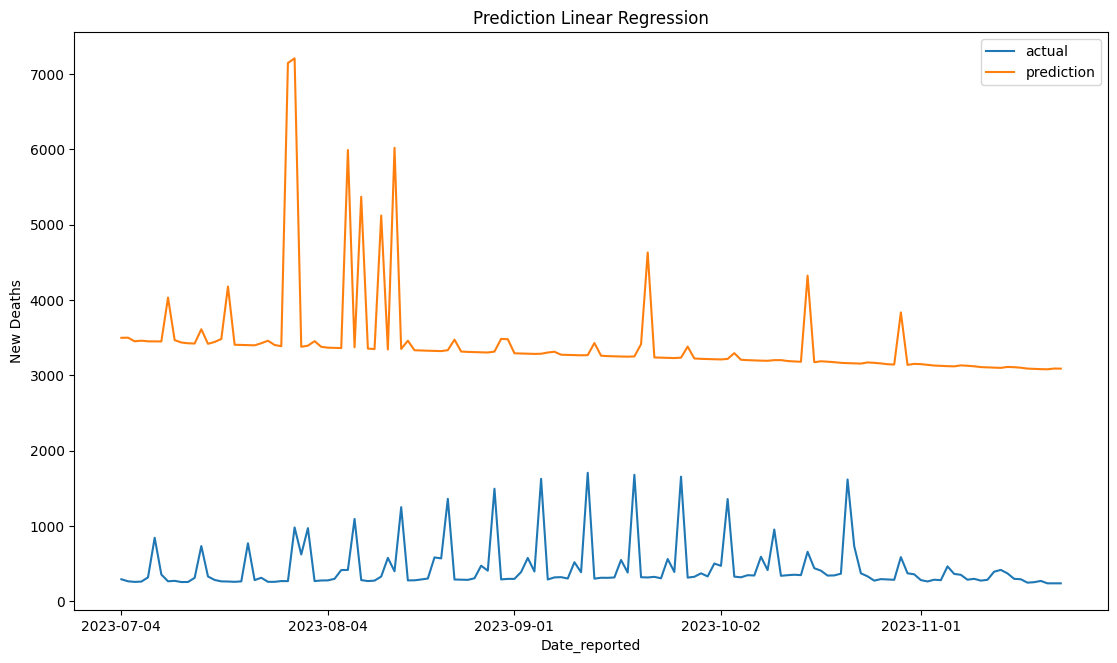

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(1280 / 96, 720 / 96))
ax.plot(dates[int(data_length*train_split):], test[target_column].values, label="actual")
ax.plot(dates[int(data_length*train_split):], pred, label="prediction")
ax.set_title("Prediction Linear Regression")
ax.set_ylabel("New Deaths")
ax.set_xlabel(date_column)
ax.legend()
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
plt.show()

RMSE of the result

In [9]:
print_evaluation_metrics(pred, test[target_column].values)

Evaluation Metrics:
MSE: 9388940.66
RMSE: 3064.14
MAE: 2982.33
MAPE: 872.89
SMAPE: 155.39


In [5]:
store_model(model, "regression")